<a href="https://colab.research.google.com/github/sachin090900/hotel-booking-analysis/blob/main/Copy_of_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
# Importing essential python libraries
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive                    # here we are Mounting drive to access the dataset
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#reading the csv file
hotel_df=pd.read_csv("/content/drive/MyDrive/Hotel Bookings.csv")

In [ ]:
# having look at data we have
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
# Create a copy of dataframe for analysis

df_copy = hotel_df.copy()


now, we using unique() method to knowing the unique values   of some columns

In [ ]:
df_copy['hotel'].unique()


array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
df_copy['is_canceled'].unique()


array([0, 1])

In [ ]:
df_copy['arrival_date_year'].unique()


array([2015, 2016, 2017])

In [ ]:
df_copy['meal'].unique()


array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
df_copy['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [ ]:
df_copy['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO', 'Undefined', 'GDS'], dtype=object)

In [ ]:
df_copy['children'].unique()    # This column has 0 as well as null values

array([ 0.,  1.,  2., 10.,  3., nan])

first we prepare the dataset for EDA by doing following steps: \
Remove duplicate rows \
Handling missing values. \
Convert columns to appropriate datatypes. \
Adding important columns\






1: checking duplicate rows if any 

In [ ]:
df_copy[df_copy.duplicated()].shape   # Show no. of rows of duplicate rows duplicate rows

(31994, 32)

In [ ]:
# Deleting duplicate values
df_copy.drop_duplicates(inplace = True)

In [ ]:
df_copy.shape

(87396, 32)

2: Handling the missing values or null values

In [ ]:
# Columns having missing values or null values.
df_copy.isnull().sum().sort_values(ascending = False)[:5]

company               82137
agent                 12193
country                 452
children                  4
reserved_room_type        0
dtype: int64

Since, company and agent columns have numerical values as it data. There are Some customer who neither booked through company nor agent. So in that case values can be null under these columns.
We replace null values by 0 in these columns

In [ ]:
df_copy[['company','agent']] = df_copy[['company','agent']].fillna(0)


In [ ]:
df_copy['children'].unique()

array([ 0.,  1.,  2., 10.,  3., nan])

In 'children' column has 0 as value which means 0 children.There are some data missing which have null values as default.
we will t fill null values with the mean value of children.



In [ ]:
df_copy['children'].fillna(df_copy['children'].mean(), inplace = True)


now our next column is 'country' where some null values are present.So, we try to replace null values to 'others' in the column.

In [ ]:
df_copy['country'].fillna('others', inplace = True)


In [ ]:
# Checking if all null values are removed or not
df_copy.isnull().sum().sort_values(ascending = False)[:5]


hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
dtype: int64

There are some rows with total number of adults, children or babies equal to zero. So we will remove such rows.

In [ ]:
df_copy[df_copy['adults']+df_copy['babies']+df_copy['children'] == 0].shape


(166, 32)

In [ ]:
df_copy.drop(df_copy[df_copy['adults']+df_copy['babies']+df_copy['children'] == 0].index, inplace = True)


 3: Converting columns to appropriate datatypes.

In [ ]:
# Converting datatype of columns 'children', 'company' and 'agent' from float to int.
df_copy[['children', 'company', 'agent']] = df_copy[['children', 'company', 'agent']].astype('int64')


In [ ]:
# changing datatype of column 'reservation_status_date' to data_type.
df_copy['reservation_status_date'] = pd.to_datetime(df_copy['reservation_status_date'], format = '%Y-%m-%d')

 4: Adding important columns.

In [ ]:
# Adding total staying days in hotels
df_copy['total_stay'] = df_copy['stays_in_weekend_nights']+df_copy['stays_in_week_nights']

# Adding total people num as column, i.e. total people num = num of adults + children + babies
df_copy['total_people'] = df_copy['adults']+df_copy['children']+df_copy['babies']

We are adding this column so that we can analyse the stay length at hotels.

EDA\
Lets first find the correlation between the numerical data.


Since, columns like 'is_cancelled', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'is_repeated_guest', 'company', 'agent' are categorical data having numerical type. So we wont need to check them for correlation.


Also, we have added total_stay and total_people columns. So, we can remove adults, children, babies, stays_in_weekend_nights, stays_in_week_nights columns.



In [ ]:
num_df_copy = df_copy[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces','total_of_special_requests','total_stay','total_people']]


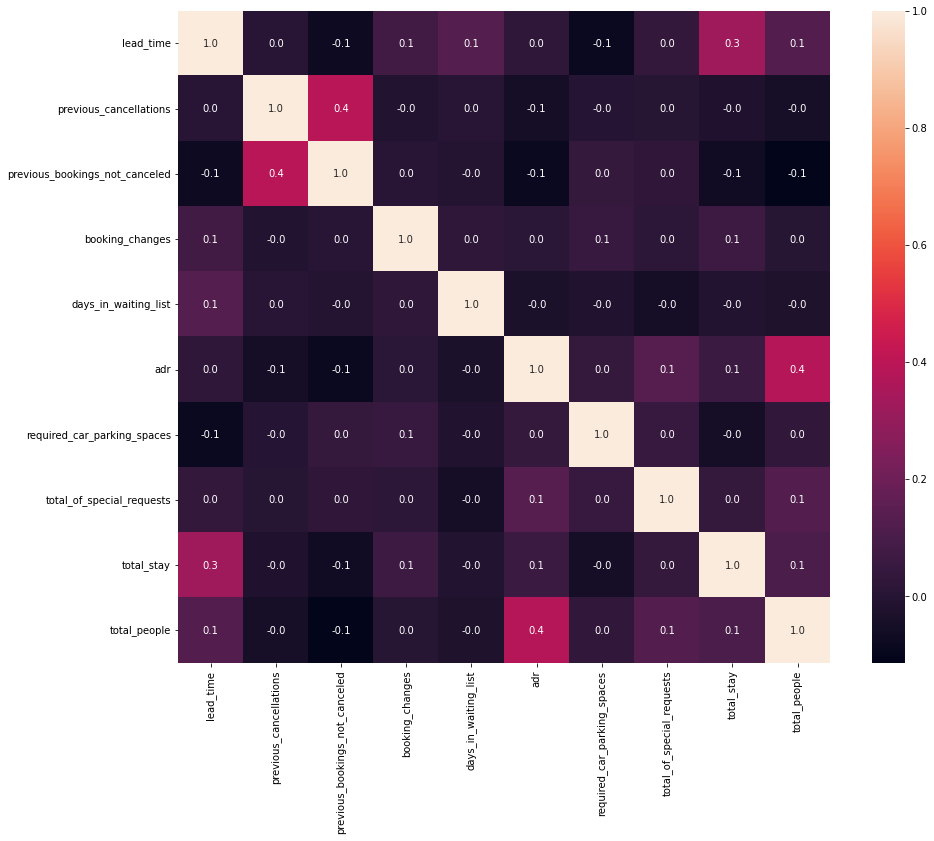

In [ ]:
#correlation matrix
corrmat = num_df_copy.corr()
f, ax = plt.subplots(figsize=(15, 12))
sns.heatmap(corrmat,annot = True,fmt='.1f', annot_kws={'size': 10},  vmax=1.0, square=True); 

Total stay length and lead time have slight correlation. This may means that for longer hotel stays people generally plan little before the the actual arrival.

adr is slightly correlated with total_people, which makes sense as more no. of people means more revenue, therefore more adr.

Lets see does length of stay affects the adr.

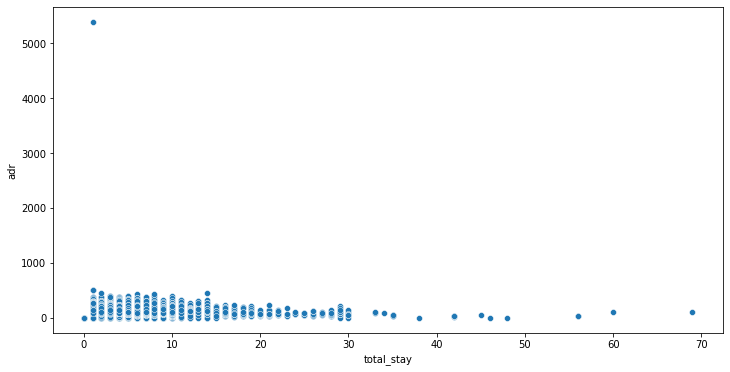

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_copy)
plt.show()


We notice that there is an outlier in adr, so we will remove that for better scatter plot

In [ ]:
df_copy.drop(df_copy[df_copy['adr'] > 5000].index, inplace = True)


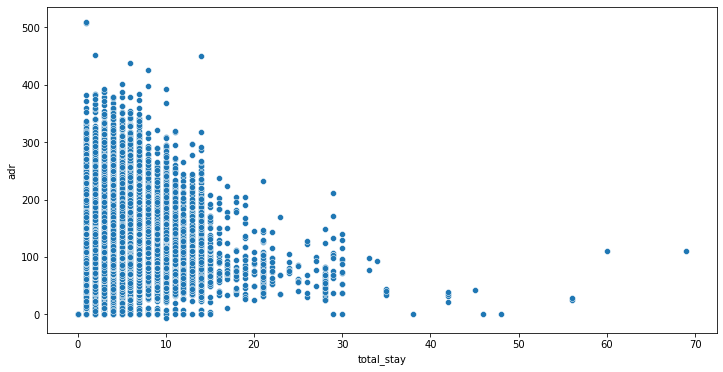

In [ ]:
plt.figure(figsize = (12,6))
sns.scatterplot(y = 'adr', x = 'total_stay', data = df_copy)
plt.show()


From the scatter plot we can see that as length of tottal_stay increases the adr decreases. This means for longer stay, the better deal for customer can be finalised.


Q1) from which countries most of the customers visit these hotels?

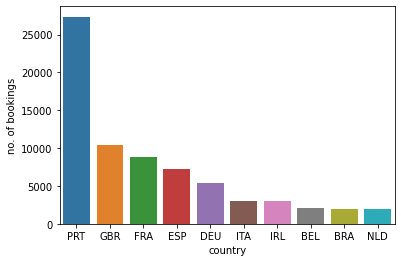

In [ ]:
grp_by_country = df_copy.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

Most of the customers come from Portugal, Great Britain, France and Spain.

Q2) Which agent makes most no. of bookings?

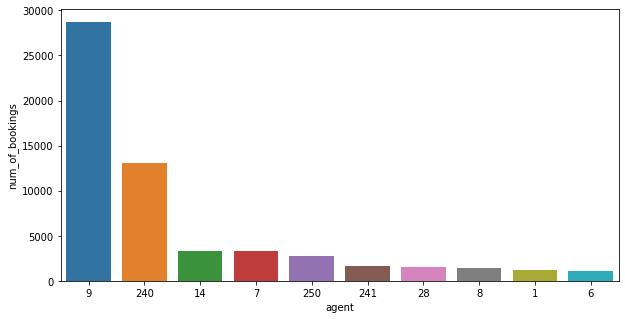

In [ ]:
d1 = pd.DataFrame(df_copy['agent'].value_counts()).reset_index().rename(columns = {'index':'agent','agent':'num_of_bookings'}).sort_values(by = 'num_of_bookings', ascending = False)
d1.drop(d1[d1['agent'] == 0].index, inplace = True)            # 0 represents that booking is not made by an agent
d1 = d1[:10]                                                   # Selecting top 10 performing agents
plt.figure(figsize = (10,5))
sns.barplot(x = 'agent', y = 'num_of_bookings', data = d1, order = d1.sort_values('num_of_bookings', ascending = False).agent)

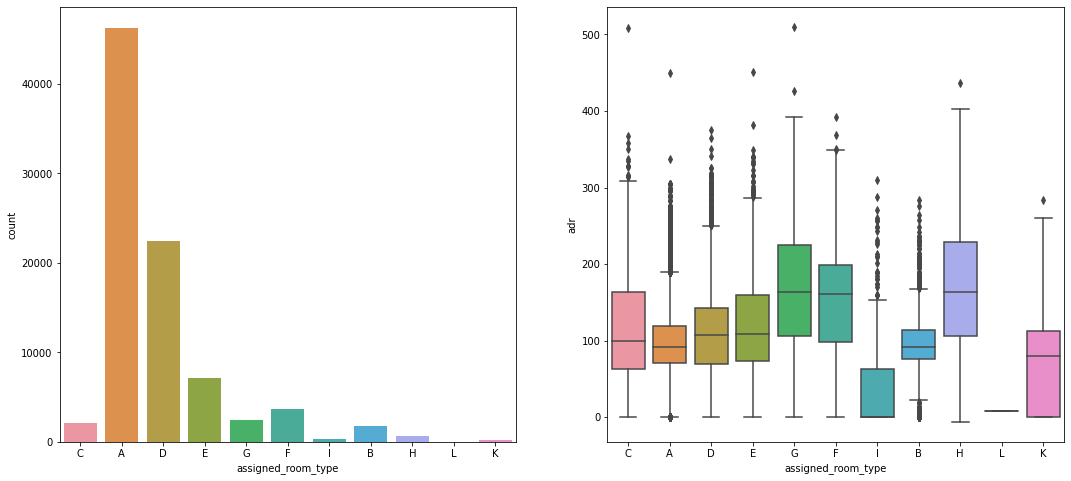

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

grp_by_room = df_copy.groupby('assigned_room_type')
d1['Num_of_bookings'] = grp_by_room.size()

sns.countplot(ax = axes[0], x = df_copy['assigned_room_type'])
sns.boxplot(ax = axes[1], x = df_copy['assigned_room_type'], y = df_copy['adr'])
plt.show()



Q3) What is percentage of bookings in each hotel?

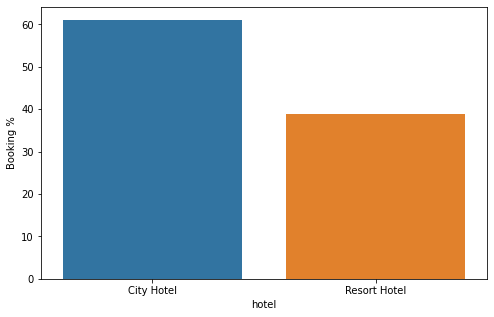

In [ ]:
grouped_by_hotel = df_copy.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df_copy.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      #Calculating percentage
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()


     


Q4) Which hotel has higher lead time?

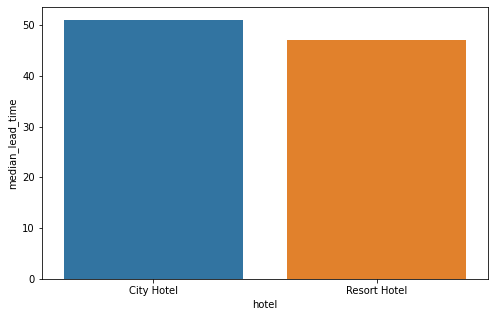

In [ ]:
d2 = grouped_by_hotel['lead_time'].median().reset_index().rename(columns = {'lead_time':'median_lead_time'})
plt.figure(figsize = (8,5))
sns.barplot(x = d2['hotel'], y = d2['median_lead_time'] )
plt.show()

Q5) What is preferred stay in each hotel?

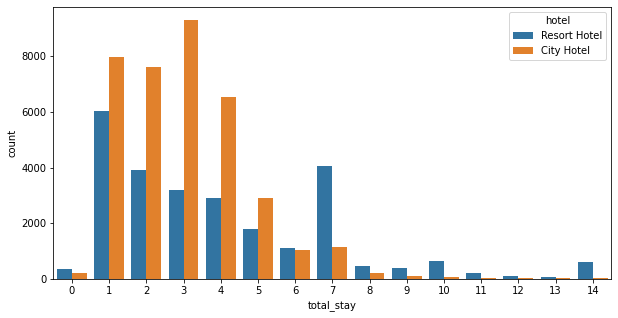

In [ ]:
not_canceled = df_copy[df_copy['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stay'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stay'], hue = s1['hotel'])
plt.show()


Q6) Which hotel has high chance that its customer will return for another stay?



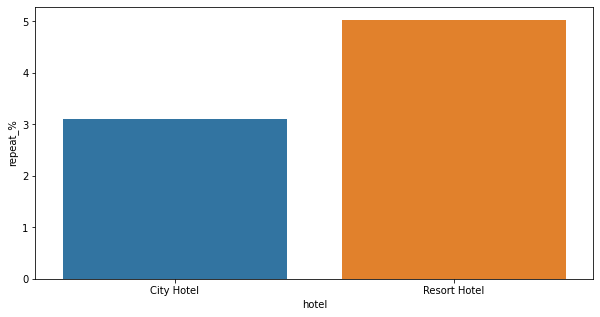

In [ ]:
# Selecting and counting repeated customers bookings
repeated_data = df_copy[df_copy['is_repeated_guest'] == 1]
repeat_grp = repeated_data.groupby('hotel')
D1 = pd.DataFrame(repeat_grp.size()).rename(columns = {0:'total_repeated_guests'})

# Counting total bookings
total_booking = grouped_by_hotel.size()
D2 = pd.DataFrame(total_booking).rename(columns = {0: 'total_bookings'})
D3 = pd.concat([D1,D2], axis = 1)

# Calculating repeat %
D3['repeat_%'] = round((D3['total_repeated_guests']/D3['total_bookings'])*100,2)

plt.figure(figsize = (10,5))
sns.barplot(x = D3.index, y = D3['repeat_%'])
plt.show()

Q7) Which channel is mostly used for early booking of hotels?

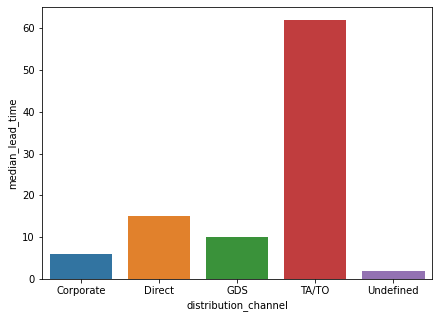

In [ ]:
group_by_dc = df_copy.groupby('distribution_channel')
d2 = pd.DataFrame(round(group_by_dc['lead_time'].median(),2)).reset_index().rename(columns = {'lead_time': 'median_lead_time'})
plt.figure(figsize = (7,5))
sns.barplot(x = d2['distribution_channel'], y = d2['median_lead_time'])
plt.show()

Q8) Which significant distribution channel has highest cancellation percentage?

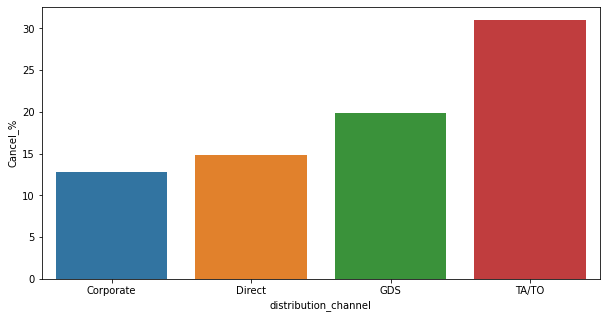

In [ ]:
d1 = pd.DataFrame((group_by_dc['is_canceled'].sum()/group_by_dc.size())*100).drop(index = 'Undefined').rename(columns = {0: 'Cancel_%'})
plt.figure(figsize = (10,5))
sns.barplot(x = d1.index, y = d1['Cancel_%'])
plt.show()

 Q9) which month has  high revenue.

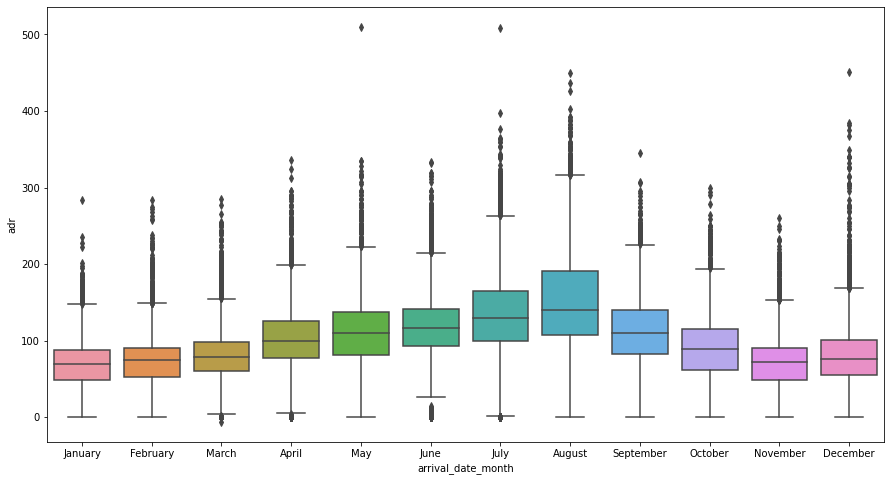

In [ ]:
reindex = ['January', 'February','March','April','May','June','July','August','September','October','November','December']
df_copy['arrival_date_month'] = pd.Categorical(df_copy['arrival_date_month'],categories=reindex,ordered=True)
plt.figure(figsize = (15,8))
sns.boxplot(x = df_copy['arrival_date_month'],y = df_copy['adr'])
plt.show()

Q10) what are the trend of arrival_num and avg adr for each day of month.

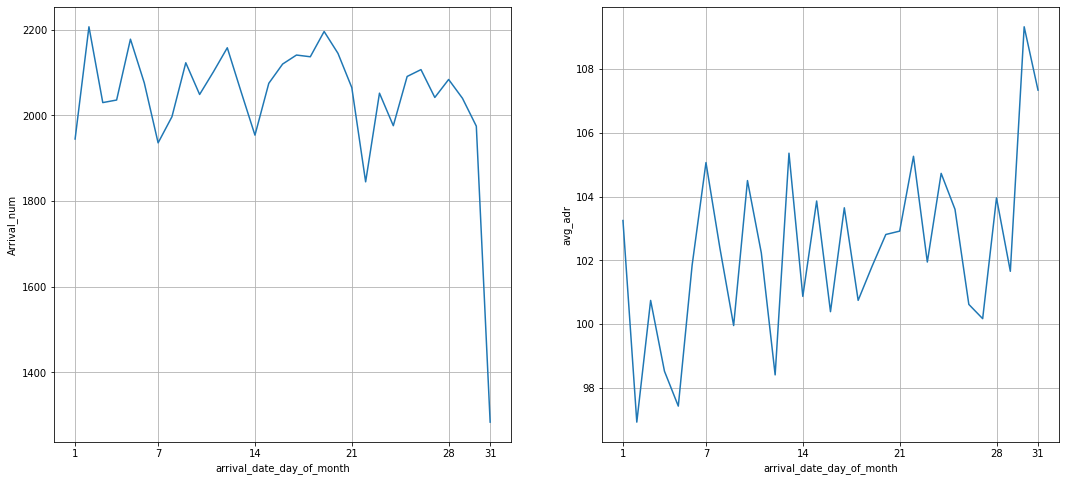

In [ ]:
d6 = pd.DataFrame(not_canceled.groupby('arrival_date_day_of_month').size()).rename(columns = {0:'Arrival_num'})
d6['avg_adr'] = not_canceled.groupby('arrival_date_day_of_month')['adr'].agg(np.mean)
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plotting arrival num for each day of month
g = sns.lineplot(ax = axes[0],x = d6.index, y = d6['Arrival_num'])
g.grid()
g.set_xticks([1,7,14,21,28,31])
g.set_xticklabels([1,7,14,21,28,31])

# Plotting avg adr for each day of month
h = sns.lineplot(ax = axes[1],x = d6.index, y = d6['avg_adr'])
h.grid()
h.set_xticks([1,7,14,21,28,31])
h.set_xticklabels([1,7,14,21,28,31])

plt.show()



Q11) which meal prefer maximum by the people?

In [ ]:
df_copy_meal=df_copy["meal"].value_counts()

In [ ]:
df_copy_meal

BB           67906
SC            9391
HB            9080
Undefined      492
FB             360
Name: meal, dtype: int64

Text(0, 0.5, 'no of people food')

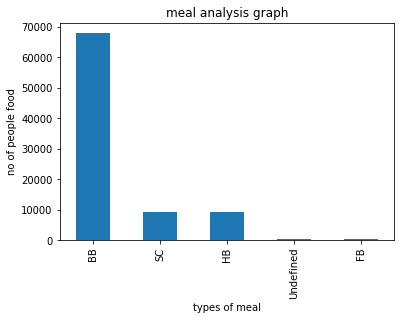

In [ ]:
df_copy_meal.plot(kind='bar')
plt.title('meal analysis graph')
plt.xlabel('types of meal')
plt.ylabel('no of people food')

In [ ]:
sns.barplot(x = d1.index, y = d1['Ctypes of meal'])

it results that most of people prefer 'BB' type meal

conclusion\
In this EDA capstone project we analyze the hotel data in very effective manner and take out the important information which can be considered for the growth of the company.in this project we have given the answers of some relevant questions to analyse the factors which are affecting the visit of customers and the things which the customers likes that is meal,hotel type etc.we also analyse the highest revenue collected by hotel in which month and also look up in the factors affecting the revenue of the hotel.we also consider the highest no.of bookings are from which agent or mode.at last we conclude by saying that we have look at the data and try to most of the relevant information for making growth of the company or hotel.